<a href="https://colab.research.google.com/github/gradient1706/mmdetection/blob/master/globalMMDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
!cp -r gdrive/My\ Drive/thirdWorkCareLabel.zip /content/

In [ ]:
!unzip thirdWorkCareLabel.zip

In [ ]:
!mv content/mmdetection/ /content
!rm -r content/
!rm -r sample_data/

In [ ]:
import os
mmdetection_dir = os.path.join("/content", "mmdetection")
work_dir = "tutorial_exps"

In [ ]:
%cd {mmdetection_dir}

/content/mmdetection


In [ ]:
!mkdir /content/data/washing_veryMild_40

In [ ]:
!python setup.py install

In [ ]:
/content/gdrive/MyDrive/globalCare200/maxacc.pth

In [ ]:
checkpoint_file = os.path.join("/content/gdrive/MyDrive/globalCare200/maxacc.pth")
assert os.path.isfile(
    checkpoint_file), '`{}` not exist'.format(checkpoint_file)
checkpoint_file

'/content/gdrive/MyDrive/globalCare200/maxacc.pth'

In [ ]:
!pip install -U torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html

# install mmcv-full thus we could use CUDA operators
!pip install mmcv-full==1.1.5

!pip install -e .

# install Pillow 7.0.0 back in order to avoid bug in colab
!pip install Pillow==7.0.0

In [ ]:
!pip install mmcv-full==1.1.5

In [ ]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

1.5.1+cu101 True
2.5.0
10.1
GCC 7.5


In [ ]:
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

import mmcv
from mmcv.runner import load_checkpoint
import mmcv.visualization.image as mmcv_image
# fix for colab


def imshow(img, win_name='', wait_time=0): plt.figure(
    figsize=(50, 50)); plt.imshow(img)


mmcv_image.imshow = imshow
from mmdet.models import build_detector
#from mmdet.apis import inference_detector, show_result, init_detector
from mmdet.apis import inference_detector, init_detector, show_result_pyplot


In [ ]:
%cat /usr/local/lib/python3.6/dist-packages/mmcv/visualization/image.py

In [ ]:
from mmcv import Config
cfg = Config.fromfile('/content/mmdetection/configs/pascal_voc/faster_rcnn_r50_fpn_1x_voc0712.py')

In [ ]:
# Build the detector
model = build_detector(
    cfg.model, train_cfg=cfg.train_cfg, test_cfg=cfg.test_cfg)


2021-01-15 13:51:31,924 - mmdet - INFO - load model from: torchvision://resnet50
2021-01-15 13:51:32,127 - mmdet - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias



In [ ]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector

In [ ]:
datasets = [build_dataset(cfg.data.train)]

In [ ]:
model.CLASSES = datasets[0].CLASSES

In [ ]:
import copy
import os.path as osp

import mmcv
import numpy as np
from operator import itemgetter 

from mmdet.datasets.builder import DATASETS
from mmdet.datasets.custom import CustomDataset
from mmdet.datasets.voc import VOCDataset

In [ ]:
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, datasets, cfg, distributed=False, validate=True)

In [ ]:
img = mmcv.imread( '/content/mmdetection/VOC2007/JPEGImages/5f97787973479.jpg')
img_path = '/content/mmdetection/VOC2007/JPEGImages/5f97787973479.jpg'
model.cfg = cfg
result = inference_detector(model, img)
show_result_pyplot(model, img_path, result, score_thr=0.9)

----------------------------------------------

oooooooooooooooooooooooooooooooooooooooooooooo
[ 1 11 16]


In [ ]:


import os
data_dir = r'/content/mmdetection/VOC2007/JPEGImages/'

directory = os.fsencode(data_dir)
for file in os.listdir(directory):
  filename = os.fsdecode(file)
  img_path = os.path.join(data_dir, filename)
  img = mmcv.imread(img_path)
  result = inference_detector(model, img)
  show_result_pyplot(model, img_path, result, score_thr=0.85)

In [ ]:
!rm -r /content/data/*

In [ ]:
CLASSES = ('bleaching_any', 'bleaching_not', 'bleaching_onlySome', 'drying_flat', 'drying_flat_drip', 'drying_flat_drip_shade', 'drying_flat_shade', 'drying_line', 'drying_line_drip', 'drying_line_drip_shade', 'drying_line_shade', 'drying_tumble_lower_60', 'drying_tumble_normal_80', 'drying_tumble_not', 'ironing_not', 'ironing_plate_110', 'ironing_plate_150', 'ironing_plate_200', 'professional_dry_mild_F', 'professional_dry_mild_P', 'professional_dry_normal_F', 'professional_dry_normal_P', 'professional_dry_not', 'professional_wet_mild_W', 'professional_wet_normal_W', 'professional_wet_not', 'professional_wet_veryMild_W', 'washing_hand_40', 'washing_mild_30', 'washing_mild_40', 'washing_mild_60', 'washing_normal_30', 'washing_normal_40', 'washing_normal_60', 'washing_normal_95', 'washing_not', 'washing_veryMild_30', 'washing_veryMild_40')

In [ ]:
for x in CLASSES:
  try:  
    os.mkdir("/content/data/"+x)  
  except OSError as error:  
    print(error) 

In [ ]:
#////////////////////////////////////////////////////////////////

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
!cp -r drive/MyDrive/careLabelSiamese/ /content/

In [3]:
!cp -r careLabelSiamese/* ../

In [ ]:
import os
import PIL.Image

data_dir = '/images_background/carelabel/drying_tumble_lower_60/'
directory = os.fsencode(data_dir)
for file in os.listdir(directory):
  filename = os.fsdecode(file)
  im = PIL.Image.open(data_dir+filename)

  basewidth = 105
  wpercent = (basewidth / float(im.size[0]))
  hsize = int((float(im.size[1]) * float(wpercent)))
  img2 = im.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
  quality_val = 100
  img2.save(data_dir+filename, 'PNG', quality=quality_val)


In [4]:

import sys
import numpy as np
import pandas as pd
from skimage import io
import pickle
import os
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import time

import tensorflow as tf
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.models import Model

from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform

from keras.engine.topology import Layer
from keras.regularizers import l2
from keras import backend as K

from sklearn.utils import shuffle

import numpy.random as rng

In [5]:
!rm -r ../data/
!rm -r weights/

rm: cannot remove '../data/': No such file or directory
rm: cannot remove 'weights/': No such file or directory


In [6]:
!mkdir ../data
!mkdir weights  

In [7]:
train_folder = "../images_background/"
val_folder = '../images_evaluation/'
save_path = '../data/'

In [8]:
def loadimgstrain(path,n = 0):
    '''
    path => Path of train directory or test directory
    '''
    X=[]
    y = []
    cat_dict = {}
    lang_dict = {}
    curr_y = n
    # we load every alphabet seperately so we can isolate them later
    for alphabet in os.listdir(path):
        print("loading alphabet: " + alphabet)
        lang_dict[alphabet] = [curr_y,None]
        alphabet_path = os.path.join(path,alphabet)
        # every letter/category has it's own column in the array, so  load seperately
        for letter in os.listdir(alphabet_path):
            print('letter: '+str(letter))

            cat_dict[curr_y] = (alphabet, letter)
            category_images=[]
            letter_path = os.path.join(alphabet_path, letter)
            # read all the images in the current category
            for filename in os.listdir(letter_path):
                image_path = os.path.join(letter_path, filename)
                print(image_path)
                image = io.imread(image_path)
                
                if image.shape != (105, 105):
                  print("image: "+str(image.shape))
                  print("ERROR: "+str(image_path))

                category_images.append(image)
                y.append(curr_y)
            try:
                X.append(np.stack(category_images))
            # edge case  - last one
            except ValueError as e:
                print(e)
                #print("error - category_images:", category_images)
            curr_y += 1
            lang_dict[alphabet][1] = curr_y - 1

    y = np.vstack(y)
    X = np.stack(X)
    return X,y,lang_dict

In [9]:
X,y,c=loadimgstrain(train_folder)

loading alphabet: carelabel
letter: drying_tumble_lower_60
../images_background/carelabel/drying_tumble_lower_60/Custom-Costume-Textile-Laundry-Tag-Label-for-Towel-Pillow-Furniture-drying_tumble_lower_60-0.png
../images_background/carelabel/drying_tumble_lower_60/NORMAL-Shutterstock-329987750-drying_tumble_lower_60-0.png
../images_background/carelabel/drying_tumble_lower_60/laundry_symbols_on_a_care_label_attached_to_a_shirt-e1536738297526-drying_tumble_lower_60-0.png
../images_background/carelabel/drying_tumble_lower_60/IMG_1333-e1511029131289-drying_tumble_lower_60-0.png
../images_background/carelabel/drying_tumble_lower_60/NORMAL-Shutterstock-391487113-drying_tumble_lower_60-1.png
../images_background/carelabel/drying_tumble_lower_60/NORMAL-Shutterstock-188576492-drying_tumble_lower_60-0.png
../images_background/carelabel/drying_tumble_lower_60/60305216_2471594866224477_3096952375701667840_n-drying_tumble_lower_60-0.png
../images_background/carelabel/drying_tumble_lower_60/BN-QO403_

In [10]:
with open(os.path.join(save_path,"train.pickle"), "wb") as f:
    pickle.dump((X,c),f)

In [11]:
from PIL import Image, ImageOps

In [12]:
Xval,yval,cval=loadimgstrain(val_folder)

loading alphabet: carelabel
letter: drying_tumble_lower_60
../images_evaluation/carelabel/drying_tumble_lower_60/NORMAL-Shutterstock-675592249-drying_tumble_lower_60-0.png
../images_evaluation/carelabel/drying_tumble_lower_60/NORMAL-Shutterstock-233684089-drying_tumble_lower_60-0.png
../images_evaluation/carelabel/drying_tumble_lower_60/NORMAL-Shutterstock-391487113-drying_tumble_lower_60-0.png
../images_evaluation/carelabel/drying_tumble_lower_60/NORMAL-Shutterstock-1433873447-drying_tumble_lower_60-0.png
letter: drying_tumble_not
../images_evaluation/carelabel/drying_tumble_not/image12-drying_tumble_not-0.png
../images_evaluation/carelabel/drying_tumble_not/image7-drying_tumble_not-0.png
../images_evaluation/carelabel/drying_tumble_not/7116_nen-giat-ao-quan-va-khan-tam-o-nhiet-do-nao-la-tot-nhat-1-drying_tumble_not-0.png
../images_evaluation/carelabel/drying_tumble_not/NORMAL-Shutterstock-1230717271-drying_tumble_not-0.png
letter: professional_dry_not
../images_evaluation/carelabel/p

In [13]:
with open(os.path.join(save_path,"val.pickle"), "wb") as f:
    pickle.dump((Xval,cval),f)

In [21]:
def initialize_weights(shape, dtype=None):
    """
        The paper, http://www.cs.utoronto.ca/~gkoch/files/msc-thesis.pdf
        suggests to initialize CNN layer weights with mean as 0.0 and standard deviation of 0.01
    """
    return np.random.normal(loc = 0.0, scale = 1e-2, size = shape)

In [22]:
def initialize_bias(shape, dtype=None):
    """
        The paper, http://www.cs.utoronto.ca/~gkoch/files/msc-thesis.pdf
        suggests to initialize CNN layer bias with mean as 0.5 and standard deviation of 0.01
    """
    return np.random.normal(loc = 0.5, scale = 1e-2, size = shape)

In [23]:
def get_siamese_model(input_shape):
    """
        Model architecture based on the one provided in: http://www.cs.utoronto.ca/~gkoch/files/msc-thesis.pdf
    """
    
    # Define the tensors for the two input images
    left_input = Input(input_shape)
    right_input = Input(input_shape)
    
    # Convolutional Neural Network
    model = Sequential()
    model.add(Conv2D(64, (10,10), activation='relu', input_shape=input_shape,
                   kernel_initializer=initialize_weights, kernel_regularizer=l2(2e-4)))
    model.add(MaxPooling2D())
    model.add(Conv2D(128, (7,7), activation='relu',
                     kernel_initializer=initialize_weights,
                     bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4)))
    model.add(MaxPooling2D())
    model.add(Conv2D(128, (4,4), activation='relu', kernel_initializer=initialize_weights,
                     bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4)))
    model.add(MaxPooling2D())
    model.add(Conv2D(256, (4,4), activation='relu', kernel_initializer=initialize_weights,
                     bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4)))
    model.add(Flatten())
    model.add(Dense(4096, activation='sigmoid',
                   kernel_regularizer=l2(1e-3),
                   kernel_initializer=initialize_weights,bias_initializer=initialize_bias))
    
    # Generate the encodings (feature vectors) for the two images
    encoded_l = model(left_input)
    encoded_r = model(right_input)
    
    # Add a customized layer to compute the absolute difference between the encodings
    L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
    L1_distance = L1_layer([encoded_l, encoded_r])
    
    # Add a dense layer with a sigmoid unit to generate the similarity score
    prediction = Dense(1,activation='sigmoid',bias_initializer=initialize_bias)(L1_distance)
    
    # Connect the inputs with the outputs
    siamese_net = Model(inputs=[left_input,right_input],outputs=prediction)
    
    # return the model
    return siamese_net

In [24]:
model = get_siamese_model((105, 105, 1))
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 105, 105, 1) 0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 105, 105, 1) 0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 4096)         38947648    input_3[0][0]                    
                                                                 input_4[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 4096)         0           sequential_1[0][0]         

In [25]:
optimizer = Adam(lr = 0.00006)
model.compile(loss="binary_crossentropy",optimizer=optimizer)

In [26]:
with open(os.path.join(save_path, "train.pickle"), "rb") as f:
    (Xtrain, train_classes) = pickle.load(f)
    
print("Training alphabets: \n")
print(list(train_classes.keys()))

Training alphabets: 

['carelabel']


In [27]:
with open(os.path.join(save_path, "val.pickle"), "rb") as f:
    (Xval, val_classes) = pickle.load(f)

print("Validation alphabets:", end="\n\n")
print(list(val_classes.keys()))

Validation alphabets:

['carelabel']


In [28]:
def get_batch(batch_size,s="train"):
    """Create batch of n pairs, half same class, half different class"""
    if s == 'train':
        X = Xtrain
        categories = train_classes
    else:
        X = Xval
        categories = val_classes
    n_classes, n_examples, w, h = X.shape

    # randomly sample several classes to use in the batch
    categories = rng.choice(n_classes,size=(batch_size,),replace=False)
    
    # initialize 2 empty arrays for the input image batch
    pairs=[np.zeros((batch_size, h, w,1)) for i in range(2)]
    
    # initialize vector for the targets
    targets=np.zeros((batch_size,))
    
    # make one half of it '1's, so 2nd half of batch has same class
    targets[batch_size//2:] = 1
    for i in range(batch_size):
        category = categories[i]
        idx_1 = rng.randint(0, n_examples)
        pairs[0][i,:,:,:] = X[category, idx_1].reshape(w, h, 1)
        idx_2 = rng.randint(0, n_examples)
        
        # pick images of same class for 1st half, different for 2nd
        if i >= batch_size // 2:
            category_2 = category  
        else: 
            # add a random number to the category modulo n classes to ensure 2nd image has a different category
            category_2 = (category + rng.randint(1,n_classes)) % n_classes
        
        pairs[1][i,:,:,:] = X[category_2,idx_2].reshape(w, h,1)
    
    return pairs, targets

In [29]:
def generate(batch_size, s="train"):
    """a generator for batches, so model.fit_generator can be used. """
    while True:
        pairs, targets = get_batch(batch_size,s)
        yield (pairs, targets)

In [30]:
def make_oneshot_task(N, s="val", language=None):
    """Create pairs of test image, support set for testing N way one-shot learning. """
    if s == 'train':
        X = Xtrain
        categories = train_classes
    else:
        X = Xval
        categories = val_classes
    n_classes, n_examples, w, h = X.shape
    
    indices = rng.randint(0, n_examples,size=(N,))
    if language is not None: # if language is specified, select characters for that language
        low, high = categories[language]
        if N > high - low:
            raise ValueError("This language ({}) has less than {} letters".format(language, N))
        categories = rng.choice(range(low,high),size=(N,),replace=False)

    else: # if no language specified just pick a bunch of random letters
        categories = rng.choice(range(n_classes),size=(N,),replace=False)            
    true_category = categories[0]
    ex1, ex2 = rng.choice(n_examples,replace=False,size=(2,))
    test_image = np.asarray([X[true_category,ex1,:,:]]*N).reshape(N, w, h,1)
    support_set = X[categories,indices,:,:]
    support_set[0,:,:] = X[true_category,ex2]
    support_set = support_set.reshape(N, w, h,1)
    targets = np.zeros((N,))
    targets[0] = 1
    targets, test_image, support_set = shuffle(targets, test_image, support_set)
    pairs = [test_image,support_set]

    return pairs, targets

In [31]:
categories = val_classes
print(str(categories['carelabel']))

[0, 2]


In [36]:
def test_oneshot(model, N, k, s = "val", verbose = 0):
    """Test average N way oneshot learning accuracy of a siamese neural net over k one-shot tasks"""
    n_correct = 0
    if verbose:
        print("Evaluating model on {} random {} way one-shot learning tasks ... \n".format(k,N))
    for i in range(k):
        inputs, targets = make_oneshot_task(N,s)
        probs = model.predict(inputs)
        # print("probs: "+str(probs))
        # print("targets: "+str(targets))
        if np.argmax(probs) == np.argmax(targets):
            #print('Equal')
            n_correct+=1
    percent_correct = (100.0 * n_correct / k)
    if verbose:
        print("Got an average of {}% {} way one-shot learning accuracy \n".format(percent_correct,N))
    return percent_correct

In [37]:
evaluate_every = 2000 # interval for evaluating on one-shot tasks
batch_size = 3
n_iter = 20000 # No. of training iterations
N_way = 3 # how many classes for testing one-shot tasks
n_val = 2500 # how many one-shot tasks to validate on
best = -1

In [38]:
model_path = './weights/'

In [39]:
print("Starting training process!")
print("-------------------------------------")
t_start = time.time()
for i in range(1, n_iter+1):
    (inputs,targets) = get_batch(batch_size)
    loss = model.train_on_batch(inputs, targets)
    if i % evaluate_every == 0:
        print("\n ------------- \n")
        print("Time for {0} iterations: {1} mins".format(i, (time.time()-t_start)/60.0))
        print("Train Loss: {0}".format(loss)) 
        val_acc = test_oneshot(model, N_way, n_val, verbose=True)
        model.save_weights(os.path.join(model_path, 'weights.{}.h5'.format(i)))
        if val_acc >= best:
            print("Current best: {0}, previous best: {1}".format(val_acc, best))
            best = val_acc

Starting training process!
-------------------------------------

 ------------- 

Time for 2000 iterations: 0.5463889519373576 mins
Train Loss: 0.058407533913850784
Evaluating model on 2500 random 3 way one-shot learning tasks ... 

Got an average of 79.56% 3 way one-shot learning accuracy 

Current best: 79.56, previous best: -1

 ------------- 

Time for 4000 iterations: 2.765055247147878 mins
Train Loss: 0.0735238790512085
Evaluating model on 2500 random 3 way one-shot learning tasks ... 

Got an average of 80.2% 3 way one-shot learning accuracy 

Current best: 80.2, previous best: 79.56

 ------------- 

Time for 6000 iterations: 5.005815247694652 mins
Train Loss: 0.01814955845475197
Evaluating model on 2500 random 3 way one-shot learning tasks ... 

Got an average of 79.76% 3 way one-shot learning accuracy 


 ------------- 

Time for 8000 iterations: 7.229243266582489 mins
Train Loss: 0.10630491375923157
Evaluating model on 2500 random 3 way one-shot learning tasks ... 

Got an 

In [ ]:
model.load_weights(os.path.join(model_path, "weights.20000.h5"))

In [ ]:
def nearest_neighbour_correct(pairs,targets):
    """returns 1 if nearest neighbour gets the correct answer for a one-shot task
        given by (pairs, targets)"""
    L2_distances = np.zeros_like(targets)
    for i in range(len(targets)):
        L2_distances[i] = np.sum(np.sqrt(pairs[0][i]**2 - pairs[1][i]**2))
    if np.argmin(L2_distances) == np.argmax(targets):
        return 1
    return 0

In [ ]:
def test_nn_accuracy(N_ways,n_trials):
    """Returns accuracy of NN approach """
    print("Evaluating nearest neighbour on {} unique {} way one-shot learning tasks ...".format(n_trials,N_ways))

    n_right = 0
    
    for i in range(n_trials):
        pairs,targets = make_oneshot_task(N_ways,"val")
        correct = nearest_neighbour_correct(pairs,targets)
        n_right += correct
    return 100.0 * n_right / n_trials 

In [ ]:
ways = np.arange(1,10,2)
resume =  False
trials = 50

In [ ]:
val_accs, train_accs,nn_accs = [], [], []
for N in ways:    
    val_accs.append(test_oneshot(model, N, trials, "val", verbose=True))
    train_accs.append(test_oneshot(model, N, trials, "train", verbose=True))
    nn_acc = test_nn_accuracy(N, trials)
    nn_accs.append(nn_acc)
    print ("NN Accuracy = ", nn_acc)
    print("---------------------------------------------------------------------------------------------------------------")

In [ ]:
with open(os.path.join(save_path,"accuracies.pickle"), "wb") as f:
    pickle.dump((val_accs,train_accs,nn_accs),f)

In [ ]:
with open(os.path.join(save_path, "accuracies.pickle"), "rb") as f:
    (val_accs, train_accs, nn_accs) = pickle.load(f)

In [ ]:
def concat_images(X):
    """Concatenates a bunch of images into a big matrix for plotting purposes."""
    nc, h , w, _ = X.shape
    X = X.reshape(nc, h, w)
    n = np.ceil(np.sqrt(nc)).astype("int8")
    img = np.zeros((n*w,n*h))
    x = 0
    y = 0
    for example in range(nc):
        img[x*w:(x+1)*w,y*h:(y+1)*h] = X[example]
        y += 1
        if y >= n:
            y = 0
            x += 1
    return img

In [ ]:
def plot_oneshot_task(pairs):
    fig,(ax1,ax2) = plt.subplots(nrows=1, ncols=2)
    ax1.matshow(pairs[0][0].reshape(105,105), cmap='gray')
    img = concat_images(pairs[1])
    ax1.get_yaxis().set_visible(False)
    ax1.get_xaxis().set_visible(False)
    ax2.matshow(img,cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [ ]:
fig,ax = plt.subplots(1)
ax.plot(ways, val_accs, "m", label="Siamese(val set)")
ax.plot(ways, train_accs, "y", label="Siamese(train set)")
plt.plot(ways, nn_accs, label="Nearest neighbour")

ax.plot(ways, 100.0/ways, "g", label="Random guessing")
plt.xlabel("Number of possible classes in one-shot tasks")
plt.ylabel("% Accuracy")
plt.title("Omiglot One-Shot Learning Performance of a Siamese Network")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
inputs,targets = make_oneshot_task(9, "val", 'sign_data')
plt.show()

plot_oneshot_task(inputs)

**END OF STORY**

In [ ]:
def generate(batch_size, s="train"):
    """a generator for batches, so model.fit_generator can be used. """
    while True:
        pairs, targets = get_batch(batch_size,s)
        yield (pairs, targets)

In [ ]:
def make_oneshot_task(N, s="val", language=None):
    """Create pairs of test image, support set for testing N way one-shot learning. """
    if s == 'train':
        X = Xtrain
        categories = train_classes
    else:
        X = Xval
        categories = val_classes
    n_classes, n_examples, w, h = X.shape
    
    indices = rng.randint(0, n_examples,size=(N,))
    if language is not None: # if language is specified, select characters for that language
        low, high = categories[language]
        if N > high - low:
            raise ValueError("This language ({}) has less than {} letters".format(language, N))
        categories = rng.choice(range(low,high),size=(N,),replace=False)

    else: # if no language specified just pick a bunch of random letters
        categories = rng.choice(range(n_classes),size=(N,),replace=False)            
    true_category = categories[0]
    ex1, ex2 = rng.choice(n_examples,replace=False,size=(2,))
    test_image = np.asarray([X[true_category,ex1,:,:]]*N).reshape(N, w, h,1)
    support_set = X[categories,indices,:,:]
    support_set[0,:,:] = X[true_category,ex2]
    support_set = support_set.reshape(N, w, h,1)
    targets = np.zeros((N,))
    targets[0] = 1
    targets, test_image, support_set = shuffle(targets, test_image, support_set)
    pairs = [test_image,support_set]

    return pairs, targets

In [ ]:
categories = val_classes
print(str(categories['carelabel']))

[0, 2]


In [ ]:
def test_oneshot(model, N, k, s = "val", verbose = 0):
    """Test average N way oneshot learning accuracy of a siamese neural net over k one-shot tasks"""
    n_correct = 0
    if verbose:
        print("Evaluating model on {} random {} way one-shot learning tasks ... \n".format(k,N))
    for i in range(k):
        inputs, targets = make_oneshot_task(N,s)
        probs = model.predict(inputs)
        # print("probs: "+str(probs))
        # print("targets: "+str(targets))
        if np.argmax(probs) == np.argmax(targets):
            #print('Equal')
            n_correct+=1
    percent_correct = (100.0 * n_correct / k)
    if verbose:
        print("Got an average of {}% {} way one-shot learning accuracy \n".format(percent_correct,N))
    return percent_correct

In [ ]:
model_path = './weights/'

In [ ]:
# evaluate_every = 20000 # interval for evaluating on one-shot tasks
# batch_size = 2
# n_iter = 200000 # No. of training iterations
# N_way = 3 # how many classes for testing one-shot tasks
# n_val = 250 # how many one-shot tasks to validate on
# best = -1

evaluate_every = 2000 # interval for evaluating on one-shot tasks
batch_size = 2
n_iter = 200000 # No. of training iterations
N_way = 2 # how many classes for testing one-shot tasks
n_val = 2500 # how many one-shot tasks to validate on
best = -1

In [ ]:
print("Starting training process!")
print("-------------------------------------")
t_start = time.time()
for i in range(1, n_iter+1):
    (inputs,targets) = get_batch(batch_size)
    loss = model.train_on_batch(inputs, targets)
    if i % evaluate_every == 0:
        print("\n ------------- \n")
        print("Time for {0} iterations: {1} mins".format(i, (time.time()-t_start)/60.0))
        print("Train Loss: {0}".format(loss)) 
        val_acc = test_oneshot(model, N_way, n_val, "train", verbose=True)
        model.save_weights(os.path.join(model_path, 'weights.{}.h5'.format(i)))
        if val_acc >= best:
            print("Current best: {0}, previous best: {1}".format(val_acc, best))
            best = val_acc

Starting training process!
-------------------------------------

 ------------- 

Time for 2000 iterations: 0.5311052521069844 mins
Train Loss: 0.7016836404800415
Evaluating model on 2500 random 2 way one-shot learning tasks ... 

Got an average of 49.0% 2 way one-shot learning accuracy 

Current best: 49.0, previous best: -1

 ------------- 

Time for 4000 iterations: 2.8294469873110453 mins
Train Loss: 0.6994198560714722
Evaluating model on 2500 random 2 way one-shot learning tasks ... 

Got an average of 50.6% 2 way one-shot learning accuracy 

Current best: 50.6, previous best: 49.0

 ------------- 

Time for 6000 iterations: 5.072514319419861 mins
Train Loss: 0.7111759185791016
Evaluating model on 2500 random 2 way one-shot learning tasks ... 

Got an average of 50.8% 2 way one-shot learning accuracy 

Current best: 50.8, previous best: 50.6


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-49d71179f635>", line 6, in <module>
    loss = model.train_on_batch(inputs, targets)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py", line 1730, in train_on_batch
    self.reset_metrics()
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py", line 1669, in reset_metrics
    m.reset_states()
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/metrics.py", line 253, in reset_states
    K.batch_set_value([(v, 0) for v in self.variables])
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/util/dispatch.py", line 201, in wrapper
    return target(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/backend.py", line 3706, in batc

KeyboardInterrupt: ignored

In [ ]:
print('a')

a


In [ ]:
def test_oneshot(model, N, k, s = "val", verbose = 0):
    """Test average N way oneshot learning accuracy of a siamese neural net over k one-shot tasks"""
    n_correct = 0
    if verbose:
        print("Evaluating model on {} random {} way one-shot learning tasks ... \n".format(k,N))
    for i in range(k):
        inputs, targets = make_oneshot_task(N,s)
        probs = model.predict(inputs)
        print("probs: "+str(probs))
        print("targets: "+str(targets))
        if np.argmax(probs) == np.argmax(targets):
            print('Equal')
            n_correct+=1
        else:
            print("Not Equal")
    percent_correct = (100.0 * n_correct / k)
    if verbose:
        print("Got an average of {}% {} way one-shot learning accuracy \n".format(percent_correct,N))
    return percent_correct

In [ ]:
model.load_weights(os.path.join(model_path, "weights.20000.h5"))

In [ ]:
def nearest_neighbour_correct(pairs,targets):
    """returns 1 if nearest neighbour gets the correct answer for a one-shot task
        given by (pairs, targets)"""
    L2_distances = np.zeros_like(targets)
    for i in range(len(targets)):
        L2_distances[i] = np.sum(np.sqrt(pairs[0][i]**2 - pairs[1][i]**2))
    if np.argmin(L2_distances) == np.argmax(targets):
        return 1
    return 0

In [ ]:
def test_nn_accuracy(N_ways,n_trials):
    """Returns accuracy of NN approach """
    print("Evaluating nearest neighbour on {} unique {} way one-shot learning tasks ...".format(n_trials,N_ways))

    n_right = 0
    
    for i in range(n_trials):
        pairs,targets = make_oneshot_task(N_ways,"val")
        correct = nearest_neighbour_correct(pairs,targets)
        n_right += correct
    return 100.0 * n_right / n_trials

In [ ]:

ways = np.arange(1,4,1)
resume =  False
trials = 50

In [ ]:
val_accs, train_accs,nn_accs = [], [], []
for N in ways:    
    print("N: "+str(N))
    val_accs.append(test_oneshot(model, N, trials, "val", verbose=True))
    train_accs.append(test_oneshot(model, N, trials, "train", verbose=True))
    nn_acc = test_nn_accuracy(N, trials)
    nn_accs.append(nn_acc)
    print ("NN Accuracy = ", nn_acc)
    print("---------------------------------------------------------------------------------------------------------------")

N: 1
Evaluating model on 50 random 1 way one-shot learning tasks ... 

probs: [[0.6668403]]
targets: [1.]
Equal
probs: [[0.66684026]]
targets: [1.]
Equal
probs: [[0.6668403]]
targets: [1.]
Equal
probs: [[0.6668403]]
targets: [1.]
Equal
probs: [[0.6668403]]
targets: [1.]
Equal
probs: [[0.66684026]]
targets: [1.]
Equal
probs: [[0.6668403]]
targets: [1.]
Equal
probs: [[0.66684026]]
targets: [1.]
Equal
probs: [[0.6668403]]
targets: [1.]
Equal
probs: [[0.6668403]]
targets: [1.]
Equal
probs: [[0.6668403]]
targets: [1.]
Equal
probs: [[0.6668403]]
targets: [1.]
Equal
probs: [[0.6668403]]
targets: [1.]
Equal
probs: [[0.6668403]]
targets: [1.]
Equal
probs: [[0.6668403]]
targets: [1.]
Equal
probs: [[0.6668403]]
targets: [1.]
Equal
probs: [[0.6668403]]
targets: [1.]
Equal
probs: [[0.6668403]]
targets: [1.]
Equal
probs: [[0.6668403]]
targets: [1.]
Equal
probs: [[0.6668403]]
targets: [1.]
Equal
probs: [[0.6668403]]
targets: [1.]
Equal
probs: [[0.6668403]]
targets: [1.]
Equal
probs: [[0.6668403]]
tar

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


probs: [[0.66684026]
 [0.6668403 ]]
targets: [1. 0.]
Not Equal
probs: [[0.6668403]
 [0.6668403]]
targets: [1. 0.]
Equal
probs: [[0.6668403]
 [0.6668403]]
targets: [1. 0.]
Equal
probs: [[0.6668403]
 [0.6668403]]
targets: [1. 0.]
Equal
probs: [[0.6668403]
 [0.6668403]]
targets: [0. 1.]
Not Equal
probs: [[0.6668403]
 [0.6668403]]
targets: [1. 0.]
Equal
probs: [[0.66684026]
 [0.6668403 ]]
targets: [1. 0.]
Not Equal
probs: [[0.6668403]
 [0.6668403]]
targets: [0. 1.]
Not Equal
probs: [[0.6668403]
 [0.6668403]]
targets: [1. 0.]
Equal
probs: [[0.6668403]
 [0.6668403]]
targets: [0. 1.]
Not Equal
probs: [[0.6668403 ]
 [0.66684026]]
targets: [0. 1.]
Not Equal
probs: [[0.6668403]
 [0.6668403]]
targets: [0. 1.]
Not Equal
probs: [[0.6668403]
 [0.6668403]]
targets: [0. 1.]
Not Equal
probs: [[0.6668403 ]
 [0.66684026]]
targets: [0. 1.]
Not Equal
probs: [[0.66684026]
 [0.66684026]]
targets: [0. 1.]
Not Equal
probs: [[0.6668403]
 [0.6668403]]
targets: [0. 1.]
Not Equal
probs: [[0.66684026]
 [0.6668403 ]

In [ ]:
with open(os.path.join(save_path,"accuracies.pickle"), "wb") as f:
    pickle.dump((val_accs,train_accs,nn_accs),f)

In [ ]:
with open(os.path.join(save_path, "accuracies.pickle"), "rb") as f:
    (val_accs, train_accs, nn_accs) = pickle.load(f)

In [ ]:
def concat_images(X):
    """Concatenates a bunch of images into a big matrix for plotting purposes."""
    nc, h , w, _ = X.shape
    X = X.reshape(nc, h, w)
    n = np.ceil(np.sqrt(nc)).astype("int8")
    img = np.zeros((n*w,n*h))
    x = 0
    y = 0
    for example in range(nc):
        img[x*w:(x+1)*w,y*h:(y+1)*h] = X[example]
        y += 1
        if y >= n:
            y = 0
            x += 1
    return img

In [ ]:
def plot_oneshot_task(pairs):
    fig,(ax1,ax2) = plt.subplots(nrows=1, ncols=2)
    ax1.matshow(pairs[0][0].reshape(105,105), cmap='gray')
    img = concat_images(pairs[1])
    ax1.get_yaxis().set_visible(False)
    ax1.get_xaxis().set_visible(False)
    ax2.matshow(img,cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()

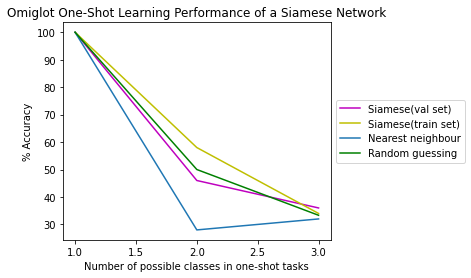

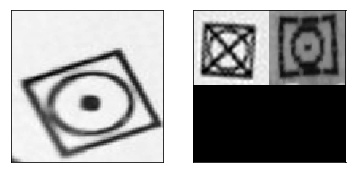

In [ ]:
fig,ax = plt.subplots(1)
ax.plot(ways, val_accs, "m", label="Siamese(val set)")
ax.plot(ways, train_accs, "y", label="Siamese(train set)")
plt.plot(ways, nn_accs, label="Nearest neighbour")

ax.plot(ways, 100.0/ways, "g", label="Random guessing")
plt.xlabel("Number of possible classes in one-shot tasks")
plt.ylabel("% Accuracy")
plt.title("Omiglot One-Shot Learning Performance of a Siamese Network")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
inputs,targets = make_oneshot_task(2, "val", 'carelabel')
plt.show()

plot_oneshot_task(inputs)

In [ ]:
!cp -r drive/MyDrive/fourthCareLabel.zip /content/

In [ ]:
!unzip fourthCareLabel.zip

In [ ]:
!mkdir /content/datatest

In [ ]:
import PIL.Image
from shutil import copyfile
data_dir = '/content/mmdetection/data/professional_dry_not/'
tar_dir1 = '../images_background/carelabel/professional_dry_not/'
tar_dir2 = '../images_evaluation/carelabel/professional_dry_not/'
tar = "/content/datatest/"
directory = os.fsencode(data_dir)
for file in os.listdir(directory):
  filename = os.fsdecode(file)
  img = os.path.join(data_dir, filename)
  if not os.path.isfile(tar_dir1+filename) and not os.path.isfile(tar_dir2+filename):
    copyfile(img, tar+filename)


In [ ]:
os.path.isfile("/images_evaluation/carelabel/drying_tumble_not/ALS_brand_Integrity_4-drying_tumble_not-0.png")

False

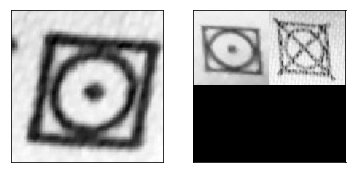

probs: [[9.9821401e-01]
 [8.0751284e-04]]
targets: [1. 0.]
Equal


In [ ]:
inputs, targets = make_oneshot_task(3,,"carelabel")
plot_oneshot_task(inputs)
probs = model.predict(inputs)
print("probs: "+str(probs))
print("targets: "+str(targets))
if np.argmax(probs) == np.argmax(targets):
    print('Equal')


In [ ]:
img = io.imread("/content/datatest/"+"ALS_brand_Integrity_4-drying_tumble_not-0.png")

In [ ]:
img.shape

(105, 105)

In [ ]:
for i in range(2):
  inputs[0][i] = img.reshape(105,105,1)

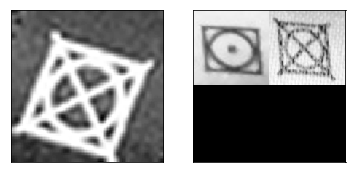

probs: [[0.01779799]
 [0.93899894]]
targets: [1. 0.]


In [ ]:
plot_oneshot_task(inputs)
probs = model.predict(inputs)
print("probs: "+str(probs))
print("targets: "+str(targets))
if np.argmax(probs) == np.argmax(targets):
    print('Equal')

In [ ]:
import os
import PIL.Image

data_dir = '/content/datatest/'
directory = os.fsencode(data_dir)
for file in os.listdir(directory):
  filename = os.fsdecode(file)
  im = PIL.Image.open(data_dir+filename)

  basewidth = 105
  wpercent = (basewidth / float(im.size[0]))
  hsize = int((float(im.size[1]) * float(wpercent)))
  img2 = im.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
  quality_val = 100
  img2.save(data_dir+filename, 'PNG', quality=quality_val)


In [ ]:
targets

array([1., 0., 0.])

In [ ]:
import os
import PIL.Image

data_dir = '/content/datatest/'
directory = os.fsencode(data_dir)
for file in os.listdir(directory):
  filename = os.fsdecode(file)
  img = io.imread(data_dir+filename)
  print(os.path.splitext(os.path.basename(filename))[0].split("-")[-2])

drying_tumble_not
drying_tumble_not
drying_tumble_not
professional_dry_not
professional_dry_not
drying_tumble_not
drying_tumble_not
drying_tumble_not
drying_tumble_not
professional_dry_not
professional_dry_not
drying_tumble_not
drying_tumble_not
professional_dry_not
drying_tumble_not
professional_dry_not
drying_tumble_not
drying_tumble_not
drying_tumble_not
drying_tumble_not
professional_dry_not
drying_tumble_not
professional_dry_not
drying_tumble_not
professional_dry_not
professional_dry_not
professional_dry_not
drying_tumble_not
drying_tumble_lower_60
drying_tumble_not
drying_tumble_not
drying_tumble_not
drying_tumble_not
drying_tumble_not
professional_dry_not
professional_dry_not
drying_tumble_not
professional_dry_not
drying_tumble_not
drying_tumble_not
professional_dry_not
drying_tumble_not
professional_dry_not
drying_tumble_not
drying_tumble_not
professional_dry_not
professional_dry_not
drying_tumble_not
drying_tumble_not
drying_tumble_not
drying_tumble_not
professional_dry_not
pr

In [ ]:
!mv /content/datatest/nhan-in-satin-64-copy-drying_tumble_not-0.png /content/datatest/nhan-in-satin-64-copy-drying_tumble_lower_60-0.png


In [ ]:
!rm /content/datatest/NORMAL-Shutterstock-374614777-drying_tumble_lower_60-0.png

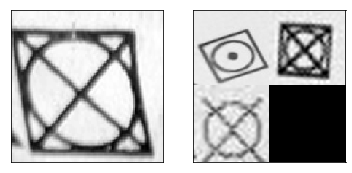

In [ ]:
inputs, targets = make_oneshot_task(3,"carelabel")
plot_oneshot_task(inputs)

/content/datatest/images59-drying_tumble_not-0.png


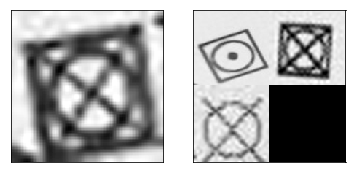

probs: [[0.6658368 ]
 [0.66583693]
 [0.6658368 ]]
targets: [0, 1, 0]
Equal
/content/datatest/NORMAL-Shutterstock-341678828-drying_tumble_not-0.png


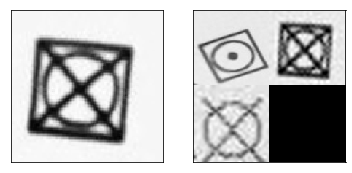

probs: [[0.66583705]
 [0.66583675]
 [0.66583705]]
targets: [0, 1, 0]
/content/datatest/NORMAL-Shutterstock-372104719-drying_tumble_not-0.png


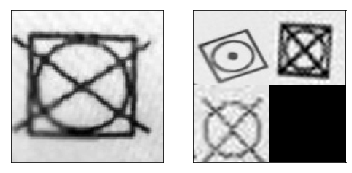

probs: [[0.6658361]
 [0.6658377]
 [0.6658361]]
targets: [0, 1, 0]
Equal
/content/datatest/wash-care-symbols-and-instructions-on-label-in-womans-top-from-marks-KFWAW5-professional_dry_not-0.png


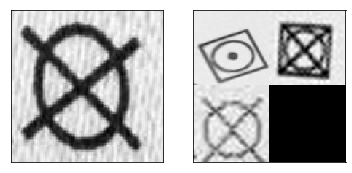

probs: [[0.66583633]
 [0.6658374 ]
 [0.66583633]]
targets: [0, 1, 0]
Equal
/content/datatest/NORMAL-Shutterstock-784868920-professional_dry_not-0.png


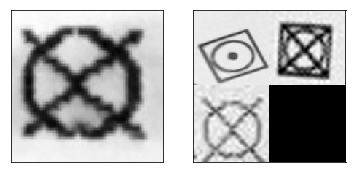

probs: [[0.6658397 ]
 [0.66583747]
 [0.6658397 ]]
targets: [0, 1, 0]
/content/datatest/NORMAL-Shutterstock-276081089-drying_tumble_not-0.png


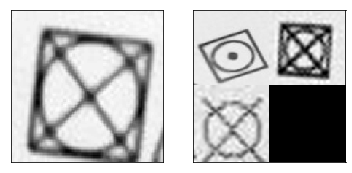

probs: [[0.6658359]
 [0.6658381]
 [0.6658359]]
targets: [0, 1, 0]
Equal
/content/datatest/image23-drying_tumble_not-0.png


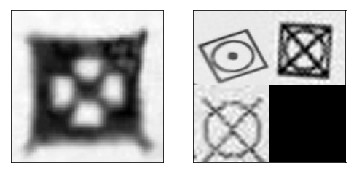

probs: [[0.6658364]
 [0.6658374]
 [0.6658364]]
targets: [0, 1, 0]
Equal
/content/datatest/NORMAL-Shutterstock-188687366-drying_tumble_not-0.png


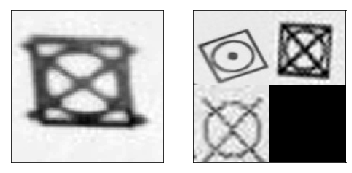

probs: [[0.6658359 ]
 [0.66583806]
 [0.6658359 ]]
targets: [0, 1, 0]
Equal
/content/datatest/aaaaaa-drying_tumble_not-0.png


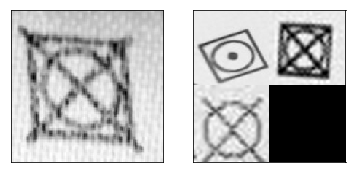

probs: [[0.665836  ]
 [0.66583776]
 [0.665836  ]]
targets: [0, 1, 0]
Equal
/content/datatest/NORMAL-Shutterstock-1710156859-professional_dry_not-0.png


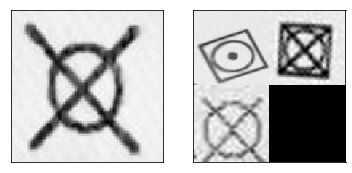

probs: [[0.6658359]
 [0.6658379]
 [0.6658359]]
targets: [0, 1, 0]
Equal
/content/datatest/aaaaaa-professional_dry_not-0.png


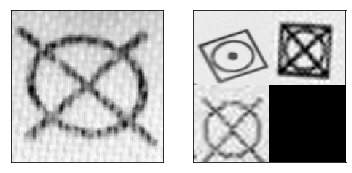

probs: [[0.6658359 ]
 [0.66583794]
 [0.6658359 ]]
targets: [0, 1, 0]
Equal
/content/datatest/NORMAL-Shutterstock-1047321028-drying_tumble_not-0.png


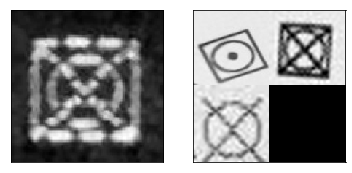

probs: [[0.6658429 ]
 [0.66584074]
 [0.6658429 ]]
targets: [0, 1, 0]
/content/datatest/image17-drying_tumble_not-0.png


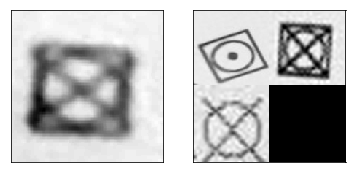

probs: [[0.6658359]
 [0.6658381]
 [0.6658359]]
targets: [0, 1, 0]
Equal
/content/datatest/image15-professional_dry_not-0.png


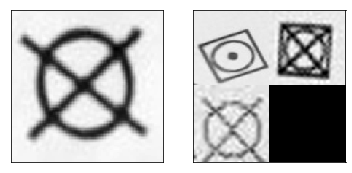

probs: [[0.6658362]
 [0.6658376]
 [0.6658362]]
targets: [0, 1, 0]
Equal
/content/datatest/nhan-in-satin-64-copy-drying_tumble_not-1.png


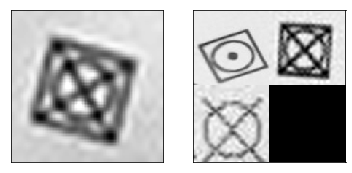

probs: [[0.66583836]
 [0.6658362 ]
 [0.66583836]]
targets: [0, 1, 0]
/content/datatest/NORMAL-Shutterstock-789071068-professional_dry_not-0.png


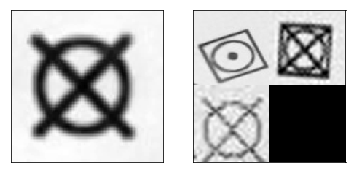

probs: [[0.66583776]
 [0.6658361 ]
 [0.66583776]]
targets: [0, 1, 0]
/content/datatest/IMG_5942-drying_tumble_not-0.png


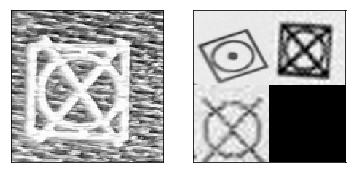

probs: [[0.66583586]
 [0.665838  ]
 [0.66583586]]
targets: [0, 1, 0]
Equal
/content/datatest/NORMAL-Shutterstock-1771778234-drying_tumble_not-0.png


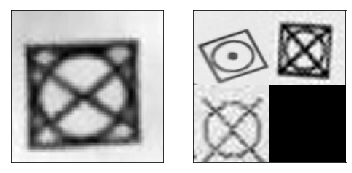

probs: [[0.66583675]
 [0.66583705]
 [0.66583675]]
targets: [0, 1, 0]
Equal
/content/datatest/NORMAL-Shutterstock-745707388-drying_tumble_not-0.png


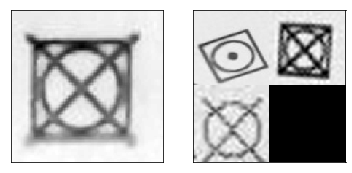

probs: [[0.66583586]
 [0.66583806]
 [0.6658359 ]]
targets: [0, 1, 0]
Equal
/content/datatest/image25-drying_tumble_not-0.png


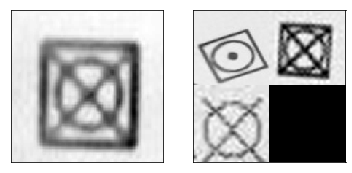

probs: [[0.66583586]
 [0.665838  ]
 [0.66583586]]
targets: [0, 1, 0]
Equal
/content/datatest/nhan-in-satin-64-copy-professional_dry_not-0.png


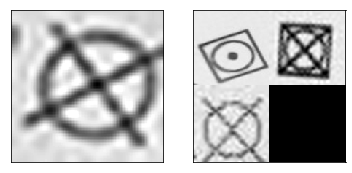

probs: [[0.6658359 ]
 [0.66583794]
 [0.6658359 ]]
targets: [0, 1, 0]
Equal
/content/datatest/download5-drying_tumble_not-0.png


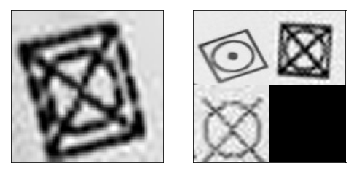

probs: [[0.66584146]
 [0.66583925]
 [0.66584146]]
targets: [0, 1, 0]
/content/datatest/download4-professional_dry_not-0.png


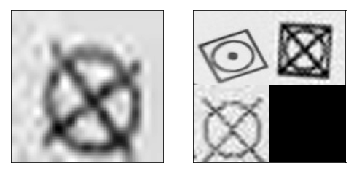

probs: [[0.6658359]
 [0.6658379]
 [0.6658359]]
targets: [0, 1, 0]
Equal
/content/datatest/image30-drying_tumble_not-0.png


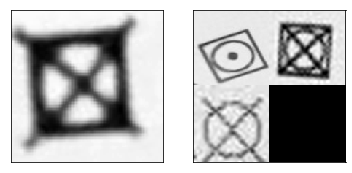

probs: [[0.66583675]
 [0.66583705]
 [0.66583675]]
targets: [0, 1, 0]
Equal
/content/datatest/NORMAL-Shutterstock-1230717271-professional_dry_not-0.png


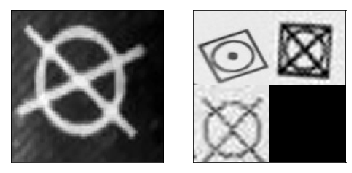

probs: [[0.66584045]
 [0.66583824]
 [0.66584045]]
targets: [0, 1, 0]
/content/datatest/NORMAL-Shutterstock-759490561-professional_dry_not-0.png


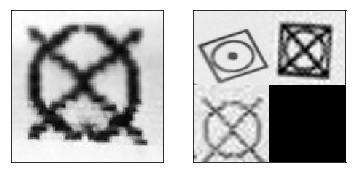

probs: [[0.66583747]
 [0.66583633]
 [0.66583747]]
targets: [0, 1, 0]
/content/datatest/NORMAL-Shutterstock-754043881-professional_dry_not-0.png


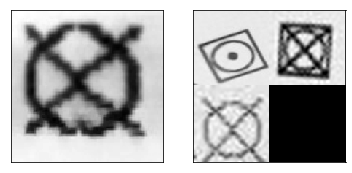

probs: [[0.6658393 ]
 [0.66583717]
 [0.6658393 ]]
targets: [0, 1, 0]
/content/datatest/NORMAL-Shutterstock-789071068-drying_tumble_not-0.png


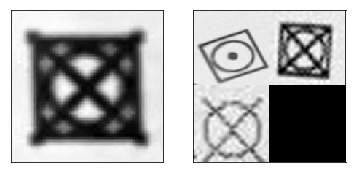

probs: [[0.6658471]
 [0.665845 ]
 [0.6658471]]
targets: [0, 1, 0]
/content/datatest/nhan-in-satin-64-copy-drying_tumble_lower_60-0.png


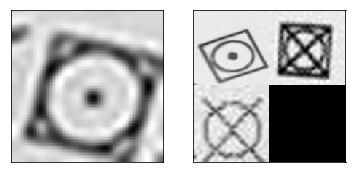

probs: [[0.6658358]
 [0.665838 ]
 [0.6658358]]
targets: [1, 0, 0]
/content/datatest/image31-drying_tumble_not-0.png


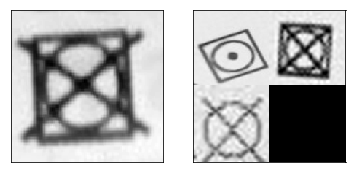

probs: [[0.66583616]
 [0.6658377 ]
 [0.66583616]]
targets: [0, 1, 0]
Equal
/content/datatest/NORMAL-Shutterstock-722434351-drying_tumble_not-0.png


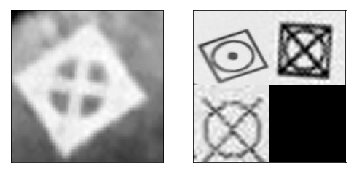

probs: [[0.6658359]
 [0.6658381]
 [0.6658359]]
targets: [0, 1, 0]
Equal
/content/datatest/NORMAL-Shutterstock-157418018-drying_tumble_not-0.png


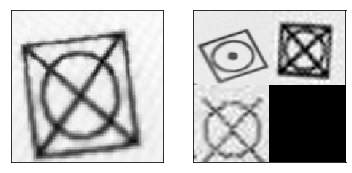

probs: [[0.6658359]
 [0.6658379]
 [0.6658359]]
targets: [0, 1, 0]
Equal
/content/datatest/NORMAL-Shutterstock-1710156859-drying_tumble_not-0.png


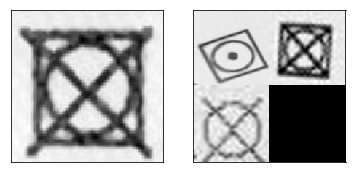

probs: [[0.665836  ]
 [0.66583776]
 [0.665836  ]]
targets: [0, 1, 0]
Equal
/content/datatest/IMG_6276-drying_tumble_not-0.png


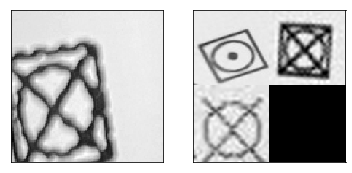

probs: [[0.6658361]
 [0.6658377]
 [0.6658361]]
targets: [0, 1, 0]
Equal
/content/datatest/image31-professional_dry_not-0.png


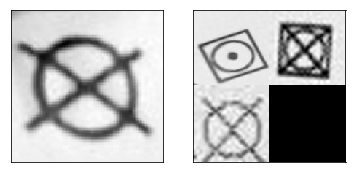

probs: [[0.6658358]
 [0.665838 ]
 [0.6658358]]
targets: [0, 1, 0]
Equal
/content/datatest/NORMAL-Shutterstock-1433873447-professional_dry_not-0.png


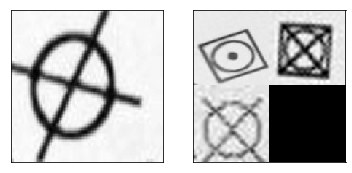

probs: [[0.665836 ]
 [0.6658378]
 [0.665836 ]]
targets: [0, 1, 0]
Equal
/content/datatest/image1-drying_tumble_not-0.png


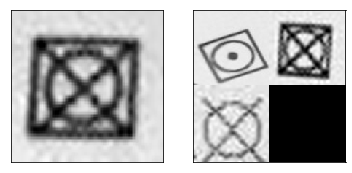

probs: [[0.66584116]
 [0.66583896]
 [0.66584116]]
targets: [0, 1, 0]
/content/datatest/NORMAL-Shutterstock-745707037-professional_dry_not-0.png


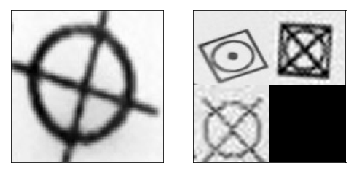

probs: [[0.66583633]
 [0.66583747]
 [0.66583633]]
targets: [0, 1, 0]
Equal
/content/datatest/wash-care-symbols-and-instructions-on-label-in-womans-top-from-marks-KFWAW5-drying_tumble_not-0.png


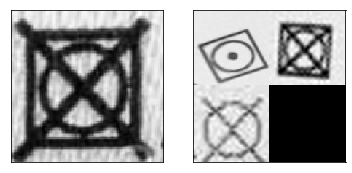

probs: [[0.66584045]
 [0.66583824]
 [0.66584045]]
targets: [0, 1, 0]
/content/datatest/NORMAL-Shutterstock-1833446482-drying_tumble_not-0.png


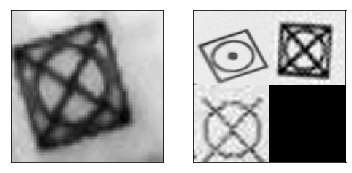

probs: [[0.66637623]
 [0.6663741 ]
 [0.66637623]]
targets: [0, 1, 0]
/content/datatest/BN-QO403_TAGSpr_M_20161101115748-professional_dry_not-0.png


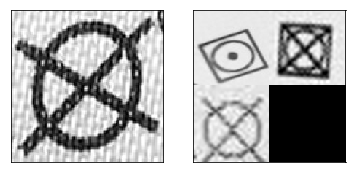

probs: [[0.66583633]
 [0.66583747]
 [0.66583633]]
targets: [0, 1, 0]
Equal
/content/datatest/NORMAL-Shutterstock-1006935226-drying_tumble_not-0.png


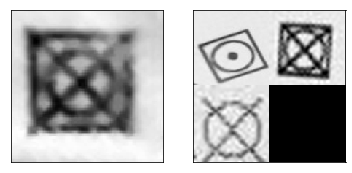

probs: [[0.6658397]
 [0.6658375]
 [0.6658397]]
targets: [0, 1, 0]
/content/datatest/NORMAL-Shutterstock-157418018-professional_dry_not-0.png


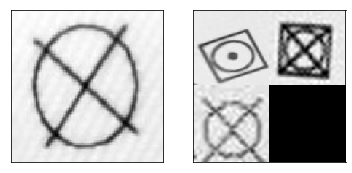

probs: [[0.6658359]
 [0.6658381]
 [0.6658359]]
targets: [0, 1, 0]
Equal
/content/datatest/nhan-suon_9-drying_tumble_not-0.png


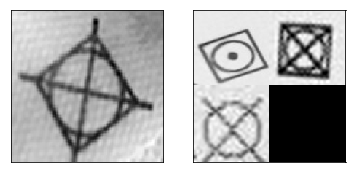

probs: [[0.6658366]
 [0.6658373]
 [0.6658366]]
targets: [0, 1, 0]
Equal
/content/datatest/NORMAL-Shutterstock-548359834-drying_tumble_not-0.png


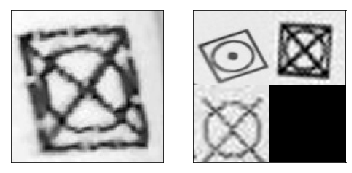

probs: [[0.6658362 ]
 [0.66583765]
 [0.66583616]]
targets: [0, 1, 0]
Equal
/content/datatest/NORMAL-Shutterstock-185739170-professional_dry_not-0.png


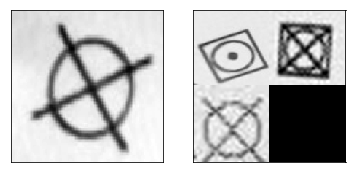

probs: [[0.6658359]
 [0.6658379]
 [0.6658359]]
targets: [0, 1, 0]
Equal
/content/datatest/image30-professional_dry_not-0.png


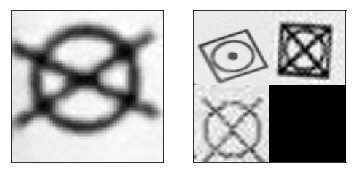

probs: [[0.665836 ]
 [0.6658378]
 [0.665836 ]]
targets: [0, 1, 0]
Equal
/content/datatest/image26-drying_tumble_not-0.png


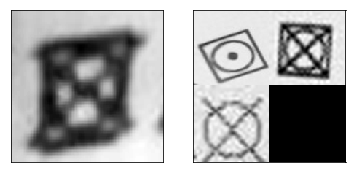

probs: [[0.665857 ]
 [0.6658549]
 [0.665857 ]]
targets: [0, 1, 0]
/content/datatest/image22-drying_tumble_not-0.png


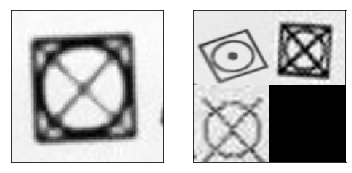

probs: [[0.6658361]
 [0.6658377]
 [0.6658361]]
targets: [0, 1, 0]
Equal
/content/datatest/download9-drying_tumble_not-0.png


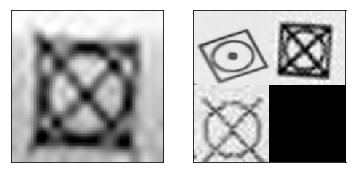

probs: [[0.6658391]
 [0.6658369]
 [0.6658391]]
targets: [0, 1, 0]
/content/datatest/ALS_brand_Integrity_4-drying_tumble_not-0.png


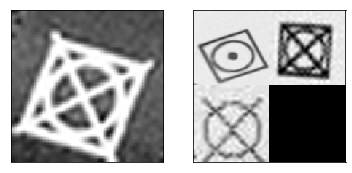

probs: [[0.6658358]
 [0.665838 ]
 [0.6658358]]
targets: [0, 1, 0]
Equal
/content/datatest/image28-professional_dry_not-0.png


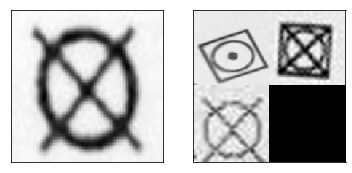

probs: [[0.6658359 ]
 [0.66583794]
 [0.6658359 ]]
targets: [0, 1, 0]
Equal
/content/datatest/NORMAL-Shutterstock-1771778234-professional_dry_not-0.png


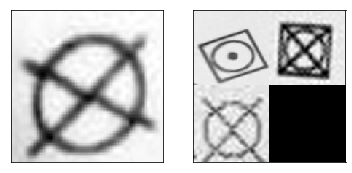

probs: [[0.6658359]
 [0.6658381]
 [0.6658359]]
targets: [0, 1, 0]
Equal
/content/datatest/NORMAL-Shutterstock-205413289-professional_dry_not-0.png


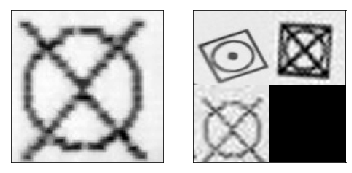

probs: [[0.66583586]
 [0.665838  ]
 [0.66583586]]
targets: [0, 1, 0]
Equal
/content/datatest/image12-professional_dry_not-0.png


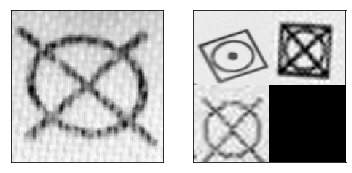

probs: [[0.6658359 ]
 [0.66583794]
 [0.6658359 ]]
targets: [0, 1, 0]
Equal
/content/datatest/NORMAL-Shutterstock-307551152-drying_tumble_not-0.png


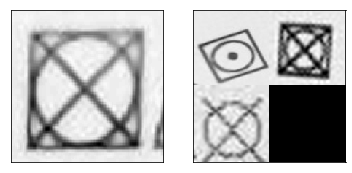

probs: [[0.6658359]
 [0.6658381]
 [0.6658359]]
targets: [0, 1, 0]
Equal
/content/datatest/image26-professional_dry_not-0.png


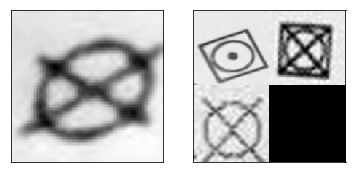

probs: [[0.665838 ]
 [0.6658358]
 [0.665838 ]]
targets: [0, 1, 0]
/content/datatest/NORMAL-Shutterstock-767180404-drying_tumble_not-0.png


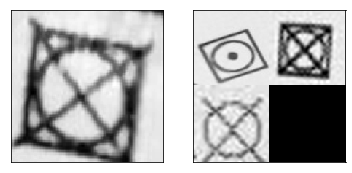

probs: [[0.6658359]
 [0.6658379]
 [0.6658359]]
targets: [0, 1, 0]
Equal
/content/datatest/NORMAL-Shutterstock-188687366-professional_dry_not-0.png


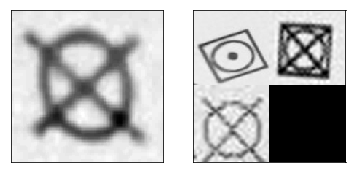

probs: [[0.6658359]
 [0.6658381]
 [0.6658359]]
targets: [0, 1, 0]
Equal
/content/datatest/NORMAL-Shutterstock-341678831-drying_tumble_not-0.png


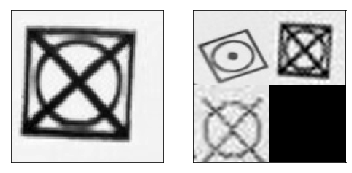

probs: [[0.6658368 ]
 [0.66583705]
 [0.6658368 ]]
targets: [0, 1, 0]
Equal
/content/datatest/image28-drying_tumble_not-0.png


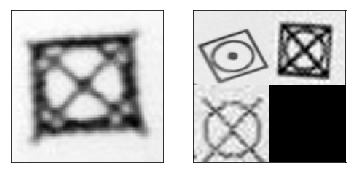

probs: [[0.66583586]
 [0.665838  ]
 [0.66583586]]
targets: [0, 1, 0]
Equal
/content/datatest/NORMAL-Shutterstock-745707037-drying_tumble_not-0.png


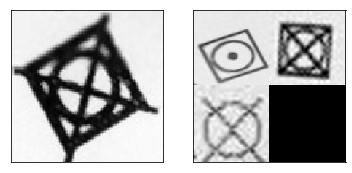

probs: [[0.66583985]
 [0.6658377 ]
 [0.66583985]]
targets: [0, 1, 0]
/content/datatest/NORMAL-Shutterstock-307551200-drying_tumble_not-0.png


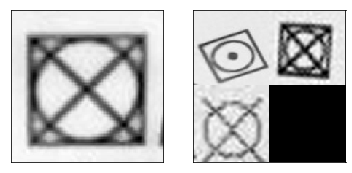

probs: [[0.6658358 ]
 [0.665838  ]
 [0.66583586]]
targets: [0, 1, 0]
Equal
/content/datatest/image4-drying_tumble_not-0.png


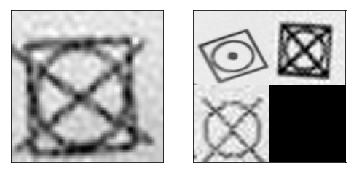

probs: [[0.66583604]
 [0.66583776]
 [0.66583604]]
targets: [0, 1, 0]
Equal
/content/datatest/NORMAL-Shutterstock-374614777-professional_dry_not-0.png


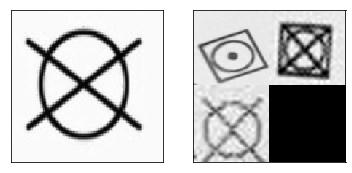

probs: [[0.6658359 ]
 [0.66583806]
 [0.6658359 ]]
targets: [0, 1, 0]
Equal
/content/datatest/NORMAL-Shutterstock-786411250-drying_tumble_not-0.png


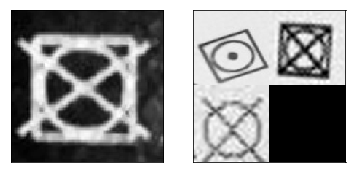

probs: [[0.66583747]
 [0.66583633]
 [0.66583747]]
targets: [0, 1, 0]
/content/datatest/image21-drying_tumble_lower_60-0.png


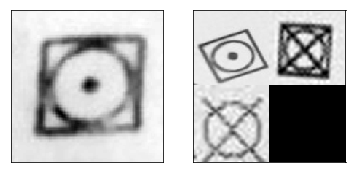

probs: [[0.66583586]
 [0.665838  ]
 [0.66583586]]
targets: [1, 0, 0]
/content/datatest/unnamed1-professional_dry_not-0.png


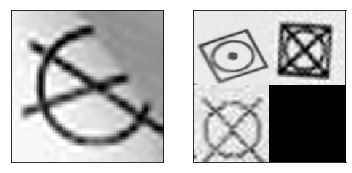

probs: [[0.6658359]
 [0.6658379]
 [0.6658359]]
targets: [1, 0, 0]
/content/datatest/NORMAL-Shutterstock-391487113-professional_dry_not-0.png


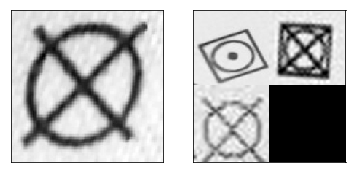

probs: [[0.6658359]
 [0.6658379]
 [0.6658359]]
targets: [1, 0, 0]
/content/datatest/NORMAL-Shutterstock-745707388-drying_tumble_not-1.png


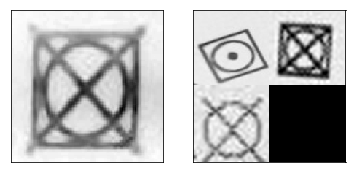

probs: [[0.6658359]
 [0.6658381]
 [0.6658359]]
targets: [0, 1, 0]
Equal
/content/datatest/NORMAL-Shutterstock-710960059-drying_tumble_not-0.png


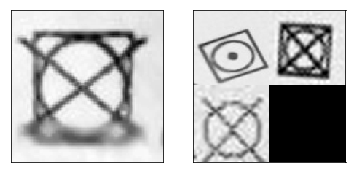

probs: [[0.66583586]
 [0.66583806]
 [0.66583586]]
targets: [0, 1, 0]
Equal
/content/datatest/polti-come-leggere-le-etichette-dei-vestiti-drying_tumble_not-0.png


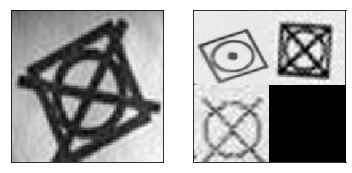

probs: [[0.6658419]
 [0.6658396]
 [0.6658418]]
targets: [0, 1, 0]
0.6666666666666666


In [ ]:
import os
import PIL.Image

data_dir = '/content/datatest/'
directory = os.fsencode(data_dir)
correct = 0
total = 0
for file in os.listdir(directory):
  filename = os.fsdecode(file)
  print(data_dir+filename)
  img = io.imread(data_dir+filename)
  for i in range(3):
    inputs[0][i] = img.reshape(105,105,1)
  if os.path.splitext(os.path.basename(filename))[0].split("-")[-2] == "professional_dry_not ":
    targets = [0,0,1]
  elif os.path.splitext(os.path.basename(filename))[0].split("-")[-2] == "drying_tumble_not":
    targets = [0,1,0]
  elif os.path.splitext(os.path.basename(filename))[0].split("-")[-2] == "drying_tumble_lower_60":
    targets = [1,0,0]
    
  plot_oneshot_task(inputs)
  probs = model.predict(inputs)
  print("probs: "+str(probs))
  print("targets: "+str(targets))
  if np.argmax(probs) == np.argmax(targets):
      print('Equal')
      correct = correct+1
  total = total+1

print(correct / total)
#/content/datatest/polti-come-leggere-le-etichette-dei-vestiti-drying_tumble_not-0.png


In [ ]:
!rm -r /content/datatest/.ipynb_checkpoints

In [ ]:
!cp -r datatest/ drive/MyDrive/